# **Workshop 4- AutoEncoders**

<br/>

### **Import All The Required Packages**

In [1]:
# Import Core Numerical Computing Library
import numpy as np

# Import Scientific Computing Library
import scipy as sp

# Import Data Manipulation And Analysis Library
import pandas as pd

# Import Core Plotting Library
import matplotlib

# Import Plotting Interface For Visualisation
import matplotlib.pyplot as plt

# Import IPython Utilities (For Interactive Features)
import IPython

# Import Machine Learning Tools And Utilities
import sklearn

# Import Core PyTorch Library
import torch

# Import Neural Network Module From PyTorch
import torch.nn as nn

# Import Optimisation Algorithms From PyTorch
import torch.optim as optim

# Import DataLoader For Handling Batches
from torch.utils.data import DataLoader

# Import Predefined Datasets And Image Transformations
from torchvision import datasets, transforms

<br/>

### **Confirm all the Packages Loaded Correctly**



In [2]:
# Print Installed Version Of NumPy
print('numpy:', np.__version__)

# Print Installed Version Of SciPy
print('scipy:', sp.__version__)

# Print Installed Version Of Matplotlib
print('matplotlib:', matplotlib.__version__)

# Print Installed Version Of IPython
print('iPython:', IPython.__version__)

# Print Installed Version Of Scikit-Learn
print('scikit-learn:', sklearn.__version__)

# Print Installed Version Of PyTorch
print('torch: ', torch.__version__)


numpy: 1.24.4
scipy: 1.10.1
matplotlib: 3.7.5
iPython: 8.12.3
scikit-learn: 1.3.2
torch:  2.4.1+cpu


<br/>

### **Define the Learning Parameters**

- Datasets.MNIST	has	the	MNIST	dataset.

- nn.Linear,	nn.Flatten()  ,	nn.Conv2d	and	nn.MaxPool2d	are	the layer	types	we	will	use to create out Convolutional Neural Net.

In [3]:
# Batch Size for Gradient Descent
batch_size = 128

# Number of MNIST Classes
num_classes = 10

# Number of Epochs (1 epoch = amount of iterations that covers the whole training set)
epochs = 3  # Try a Larger Number of Epochs Here

# Input Image Dimensions
img_rows, img_cols = 28, 28

<br/>

### **Load Training Data**

- The data, split between train and test sets.

- *(x_train, y_train), (x_test, y_test) = mnist.load_data()*

In [4]:
def get_dataloaders(batch_size=128):
    # Apply Transform To Convert Images To Tensors & Scale To [0,1]
    transform = transforms.Compose([
        transforms.ToTensor()  # Scales To [0,1] Automatically
    ])
    
    # Load MNIST Training Dataset With Transform
    train_ds = datasets.MNIST(root="./Data", train=True, download=True, transform=transform)
    
    # Load MNIST Test Dataset With Transform
    test_ds  = datasets.MNIST(root="./Data", train=False, download=True, transform=transform)
    
    return (
        train_ds, test_ds,
        # Create DataLoader For Training Dataset (Shuffled)
        DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True),
        # Create DataLoader For Test Dataset (Not Shuffled)
        DataLoader(test_ds,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
    )

# Get Datasets & DataLoaders With Specified Batch Size
train_set, test_set, train_loader, test_loader = get_dataloaders(batch_size=batch_size)

# Convert Training Images & Labels To Numpy Arrays
x_train, y_train = train_set.data.numpy(), train_set.targets.numpy()

# Convert Test Images & Labels To Numpy Arrays
x_test, y_test = test_set.data.numpy(), test_set.targets.numpy()


<br/>

**Once you successfully load the data its always a good idea to inspect it.**

> *This helps you set up the neural network training with ease.*

In [5]:
# Some Sample Code to See What Type of Data We Have
print('type of x_train', type(x_train))
print("training sample dtype:", x_train.dtype)
print(f"shape of training sample:{x_train.shape}\n")

# Check What the Labels Look Like
print('type of y_train', type(y_train))
print("training label dtype:", y_train.dtype)
print(f"shape of training sample:{y_train.shape}\n")

# Some ver of keras use data format (samples, channel, rows, colums)
# Some ver of keras use data format (samples, rows, colums, channel)
# print(K.image_data_format())

type of x_train <class 'numpy.ndarray'>
training sample dtype: uint8
shape of training sample:(60000, 28, 28)

type of y_train <class 'numpy.ndarray'>
training label dtype: int64
shape of training sample:(60000,)



Inspecting data also envolves checking what is the maximum value of the training sample. In this example we want to use float 32 as our datatype and we want the intensity of the image to be between 0-1. In the data you use for your assignment the data is already normalised.

In [6]:
# Also See What is the Maximum Value is x_train, is it 1 or is it 255?
# Uint 8 was the Format so 0-255 Will be the Range
# In your Assignment, the Data is Already Normalised....

print("Max Train Example Val:", np.max(x_train))
print("Max Train Lable Val: ", np.max(y_train))
print("Unique Values in y_train", np.unique(y_train))

Max Train Example Val: 255
Max Train Lable Val:  9
Unique Values in y_train [0 1 2 3 4 5 6 7 8 9]


<br/>

### **Normalise Data if Required**

In [7]:
# Convert Training Data To Float32 Type
x_train = x_train.astype('float32')

# Convert Test Data To Float32 Type
x_test = x_test.astype('float32')

# Normalize Training Data To Range [0,1]
x_train /= 255

# Normalize Test Data To Range [0,1]
x_test /= 255

# Print Shape Of Training Data
print('x_train shape:', x_train.shape)

# Print Number Of Training Samples
print(x_train.shape[0], 'Train Samples')

# Print Number Of Test Samples
print(x_test.shape[0], 'Test Samples')

# Print Maximum Pixel Value In Training Data (Should Be ≤ 1)
print("Max Value In Training Data Is", np.max(x_train))

x_train shape: (60000, 28, 28)
60000 Train Samples
10000 Test Samples
Max Value In Training Data Is 1.0


> *As the data is not normalized and is uint8, we will normalize it and change the data to be of type float32.*
<br/>


<br/>

### **Now Visualise Some Samples in your Data**

(28, 28)


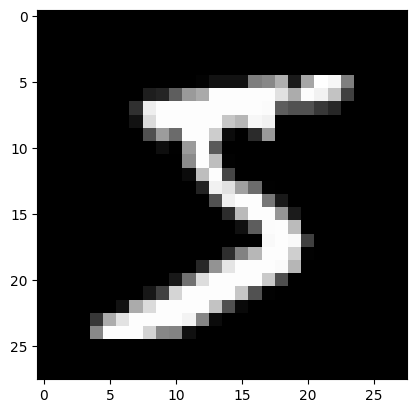

(28, 28)


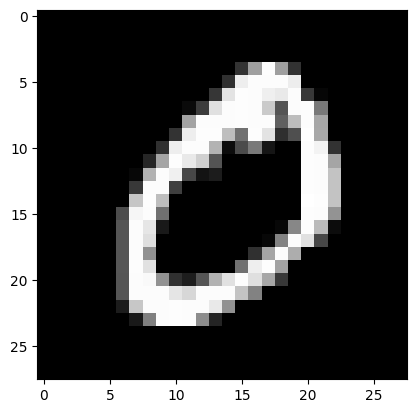

(28, 28)


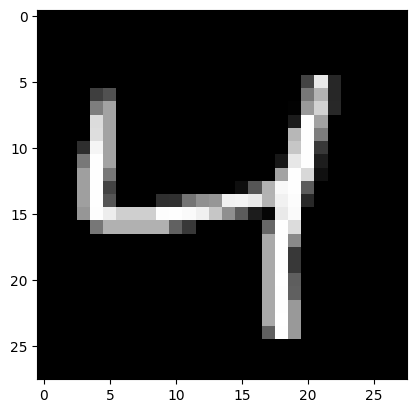

(28, 28)


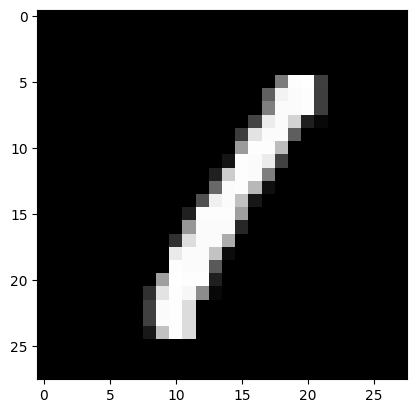

(28, 28)


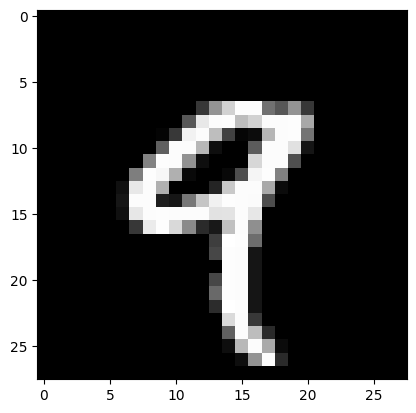

(28, 28)


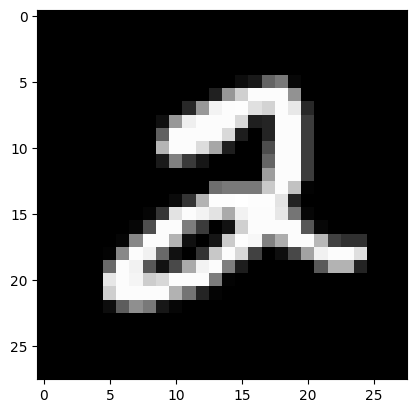

(28, 28)


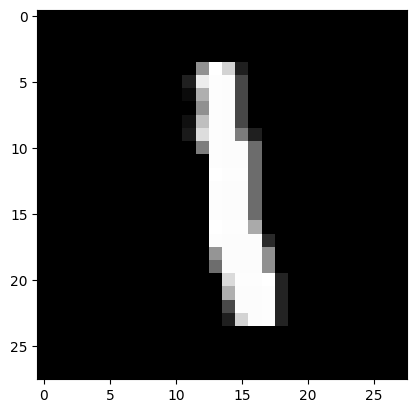

(28, 28)


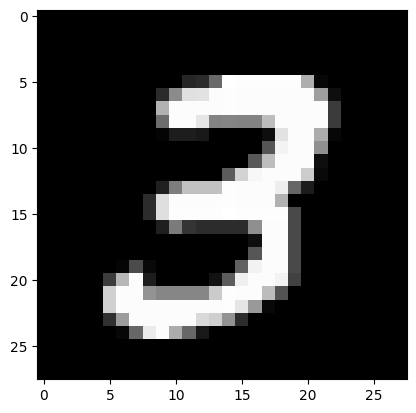

(28, 28)


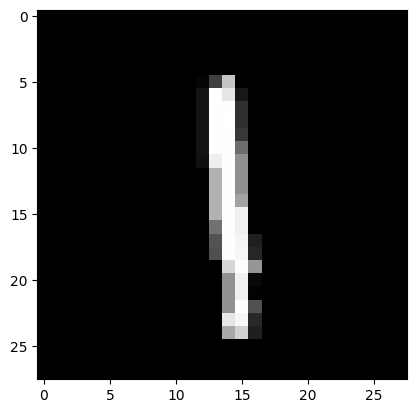

(28, 28)


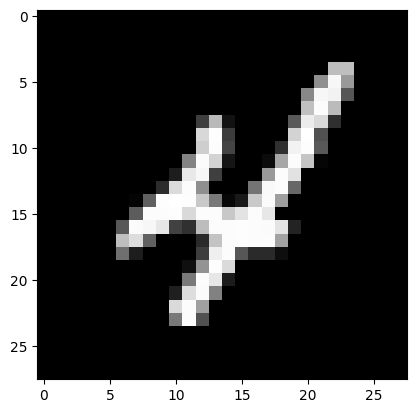

In [8]:
# Loop Through First 10 Images In Training Data
for i in range(10):
    # Select The i-th Image From Training Data
    first_image = x_train[i,:,:]
    
    # Convert Image To Float Type (If Not Already)
    first_image = np.array(first_image, dtype='float')
    
    # Print Shape Of The Image
    print(first_image.shape)
    
    # Reshape Flat Image Array To 28x28 Matrix
    pixels = first_image.reshape((28, 28))
    
    # Display The Image Using Grayscale Colormap
    plt.imshow(pixels, cmap='gray')
    plt.show()

<br/>

### **You Don't Need to Prepare the Labels that are Not Used!**

In [9]:
#print('first label', y_train[0])
#print('100th label', y_train[99])

# # Convert Class Vectors to Binary Class Matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# # Double Check the Size
#print(y_train.shape)
#print("first label", y_train[0])
#print("100th label", y_train[99])

<br/><br/>

## **Define the Neural Network you Want to Train**

![alt text](https://cdn-images-1.medium.com/max/2600/1*LSYNW5m3TN7xRX61BZhoZA.png)


### **This Time it's Encoder & Decoder to Get Image-like Output**

**nn.Conv2d is 2D convolutional layer :**

* To define it you need to pass ( number of filters, kernel size) for convolution.
* Remember you need to match the number of the channels in the input to the size of convolution filter.
* Additionally you need to spacify what is the size of input to the entire network, which you do in the very first layer you add.
* **Look at the 'padding = 1', arg in the nn.Conv2d function.** This actually pads the image with zero so that the size after convolution remain same.


**nn.MaxPool2d does subsample**
* you need to specify the size of the pooling layer.


**nn.Flatten converts (sample_size, channel, rows, cols) type data to (sample_size, *) matrix**


**Dense layers are fully connected layers**

*  The size of input is determined automatically (unless its the first layer)
*  The number of hidden neurons need to be specified.
*  Remember Activation
* The last one is softmax!
* Due to the loss function in use.
* Remember it guarantees the output to be between 0-1


> *To get image like output you need upsampling operations. **nn.Upsample layers** do that for you.*



In [11]:
class LeNetAutoencoder(nn.Module):
    """
    Convolutional auto‑encoder mirroring the architecture of the original
    Keras / TensorFlow implementation in `MNIST_LeNet_Autoencoder.ipynb`,
    where the bottleneck layer uses 50 units with a sigmoid activation.
    
    
    """
    def __init__(self):
        super().__init__()
        # Encoder
        self.enc_conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)   # 1→8
        self.enc_conv2 = nn.Conv2d(8, 8, kernel_size=3, padding=1)   # 8→8
        self.enc_conv3 = nn.Conv2d(8, 4, kernel_size=3, padding=1)   # 8→4
        self.pool = nn.MaxPool2d(2, 2)  # Halves H & W
        # Bottleneck
        self.flatten = nn.Flatten()
        self.fc_enc1 = nn.Linear(4*7*7, 100)
        self.fc_bottle = nn.Linear(100, 50)  # Bottleneck Layer
        self.fc_dec1 = nn.Linear(50, 4*7*7)
        # Decoder
        self.dec_conv1 = nn.Conv2d(4, 8, kernel_size=3, padding=1)   # 4→8
        self.dec_conv2 = nn.Conv2d(8, 4, kernel_size=3, padding=1)   # 8→4
        self.dec_conv3 = nn.Conv2d(4, 1, kernel_size=3, padding=1)   # 4→1

        self.relu = nn.ReLU(inplace=True)
        self.sigmoid = nn.Sigmoid()
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')

    def forward(self, x):
        # Encoder
        x = self.relu(self.enc_conv1(x))
        x = self.pool(x)                # 8×14×14
        x = self.relu(self.enc_conv2(x))
        x = self.pool(x)                # 8×7×7
        x = self.relu(self.enc_conv3(x))# 4×7×7
        # Bottleneck
        x = self.flatten(x)             # (N, 4*7*7)
        x = self.relu(self.fc_enc1(x))  # (N, 100)
        x = self.sigmoid(self.fc_bottle(x)) # (N, 50)
        x = self.relu(self.fc_dec1(x))  # (N, 4*7*7)
        # Decoder
        x = x.view(-1, 4, 7, 7)         # (N,4,7,7)
        x = self.relu(self.dec_conv1(x))# 8×7×7
        x = self.upsample(x)            # 8×14×14
        x = self.relu(self.dec_conv2(x))# 4×14×14
        x = self.upsample(x)            # 4×28×28
        x = self.sigmoid(self.dec_conv3(x)) # 1×28×28
        return x

<br/>

### **Define Training Loop**

* Which loss to use?
* Which metric to use for validation?
* Remember these two things can be different?
* Autoencoder uses reconstruction loss. you can use MSE or absolute_squered_error!
* **Will also work with cross entropy!!**

In [12]:
# Define The Training Loop
def train(model, train_loader, epochs=3, lr=1e-3, device="cuda" if torch.cuda.is_available() else "cpu"):
    # Move Model To Specified Device (GPU Or CPU)
    model.to(device)
    
    # Define Mean Squared Error Loss Function
    criterion = nn.MSELoss()
    
    # Use Adam Optimizer With Specified Learning Rate
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Set Model To Training Mode
    model.train()
    
    # Loop Over Each Epoch
    for epoch in range(1, epochs + 1):
        running_loss = 0.0
        
        # Loop Over Batches In Training Data
        for imgs, _ in train_loader:
            # Move Images To Specified Device
            imgs = imgs.to(device)
            
            # Zero The Gradients
            optimizer.zero_grad()
            
            # Forward Pass Through The Model
            outputs = model(imgs)
            
            # Compute Loss Between Output And Input
            loss = criterion(outputs, imgs)
            
            # Backpropagate The Loss
            loss.backward()
            
            # Update Model Parameters
            optimizer.step()
            
            # Accumulate Loss Weighted By Batch Size
            running_loss += loss.item() * imgs.size(0)
        
        # Compute Average Loss For The Epoch
        epoch_loss = running_loss / len(train_loader.dataset)
        
        # Print Epoch Loss
        print(f"Epoch {epoch:02d}/{epochs} | MSE: {epoch_loss:.6f}")
    
    return model


# Define The Test Loop
def test(model, test_loader, device=None):
    # Use Specified Device Or Default To GPU If Available
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    
    # Move Model To Device
    model.to(device)
    
    # Set Model To Evaluation Mode
    model.eval()
    
    # Use Sum Reduction For Total Loss Computation
    criterion = nn.MSELoss(reduction='sum')
    total_loss = 0.0
    
    # Disable Gradient Calculation
    with torch.no_grad():
        # Loop Over Test Data Batches
        for imgs, _ in test_loader:
            # Move Images To Device
            imgs = imgs.to(device)
            
            # Forward Pass Through The Model
            outputs = model(imgs)
            
            # Compute Loss Between Output And Input
            loss = criterion(outputs, imgs)
            
            # Accumulate Total Loss
            total_loss += loss.item()
    
    # Compute Mean Squared Error Over Entire Test Set
    mse = total_loss / len(test_loader.dataset)
    
    # Print Test MSE
    print(f"Test MSE: {mse:.6f}")
    
    return mse

<br/>

### **Finally Training**

Running the training for 20 epochs this time.

In [13]:
# # Keras Training Code (Commented Out For Reference)
# history = model.fit(x_train, x_train,
#               batch_size=batch_size,
#               epochs=40,
#               verbose=1,
#               validation_data=(x_test, x_test))

# Instantiate The LeNet-Based Autoencoder Model
model = LeNetAutoencoder()

# Train The Model Using The Custom Training Loop
trained_model = train(model, train_loader, epochs=20)

# Save The Trained Model's Weights To File
torch.save(trained_model.state_dict(), "lenet_autoencoder_pytorch.pth")

# Evaluate The Model Using The Test Loop
test(trained_model, test_loader)

Epoch 01/20 | MSE: 0.077351
Epoch 02/20 | MSE: 0.064060
Epoch 03/20 | MSE: 0.036708
Epoch 04/20 | MSE: 0.025981
Epoch 05/20 | MSE: 0.021831
Epoch 06/20 | MSE: 0.019434
Epoch 07/20 | MSE: 0.017898
Epoch 08/20 | MSE: 0.016809
Epoch 09/20 | MSE: 0.015937
Epoch 10/20 | MSE: 0.015251
Epoch 11/20 | MSE: 0.014693
Epoch 12/20 | MSE: 0.014162
Epoch 13/20 | MSE: 0.013718
Epoch 14/20 | MSE: 0.013312
Epoch 15/20 | MSE: 0.012967
Epoch 16/20 | MSE: 0.012639
Epoch 17/20 | MSE: 0.012363
Epoch 18/20 | MSE: 0.012103
Epoch 19/20 | MSE: 0.011901
Epoch 20/20 | MSE: 0.011641
Test MSE: 8.692541


8.692540521240234

<br/>

### **Test your Model**

* I simply try to denoise first 10 examples and and visualise output.
* You can also use the botteleneck's output as intermediate image representation for various learning problems.
* Explore how to get the intermediate array after image encoding from keras if you are interested.

(10, 28, 28)


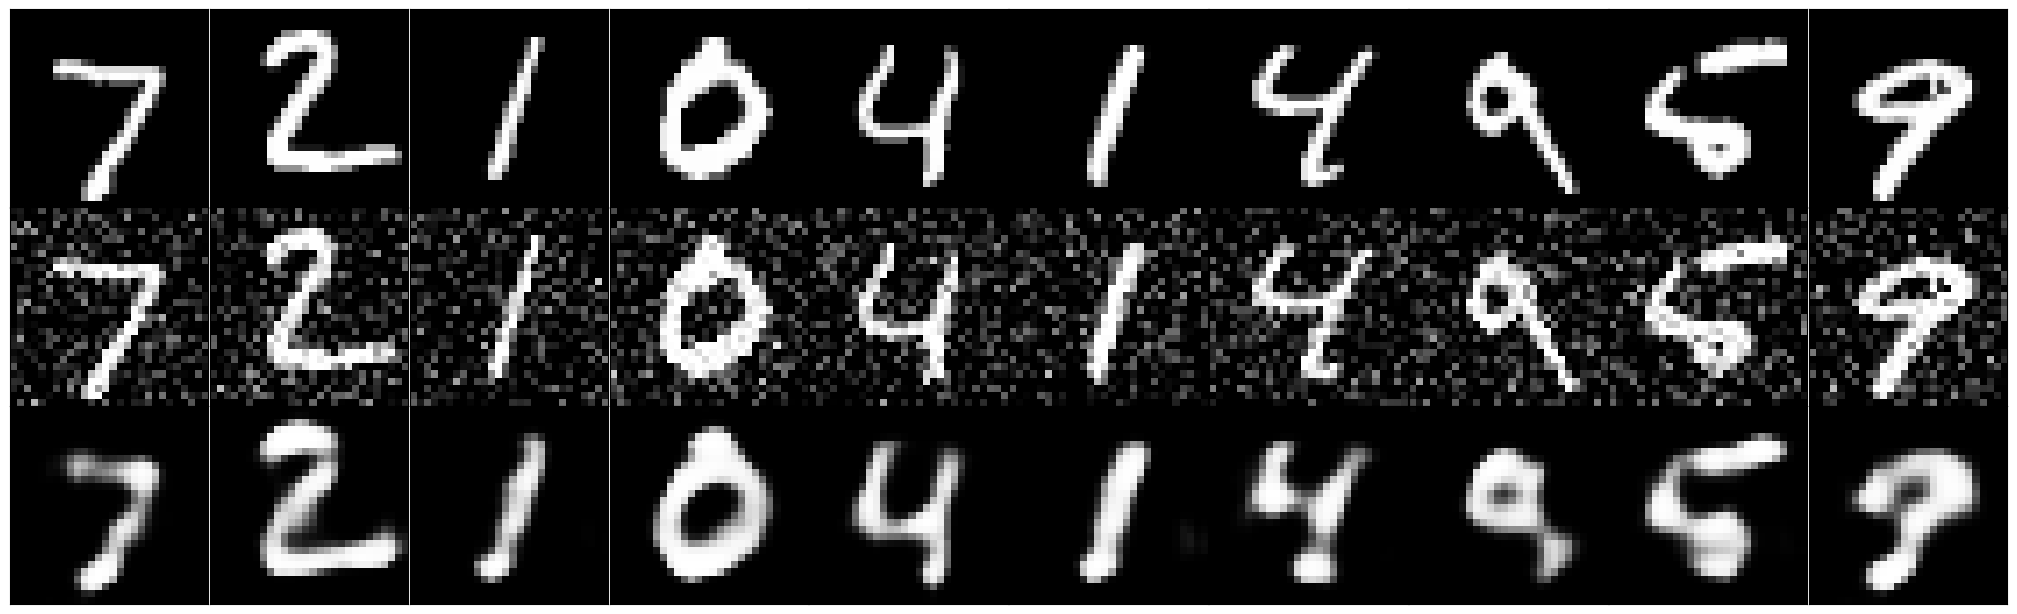

In [14]:
# Create A Figure With 3 Rows And 10 Columns Of Subplots
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20, 6))

# Select The First 10 Test Images As Input
in_imgs = x_test[:10]

# Print Shape Of The Input Images
print(in_imgs.shape)

# Add Gaussian Noise To The Images
noisy_imgs = in_imgs + 0.2 * np.random.randn(*in_imgs.shape)

# Clip Pixel Values To Be Within [0, 1]
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

# Disable Gradient Computation For Inference
with torch.no_grad():
    # Convert Noisy Images To PyTorch Tensor And Add Channel Dimension
    noisy_imgs = torch.tensor(noisy_imgs, dtype=torch.float32).unsqueeze(1)
    
    # Pass Noisy Images Through Autoencoder To Reconstruct
    reconstructed = model(noisy_imgs)

# Loop Through Each Row Of Images (Original, Noisy, Reconstructed)
for images, row in zip([in_imgs, noisy_imgs, reconstructed], axes):
    # Loop Through Each Image In The Row And Its Corresponding Subplot Axis
    for img, ax in zip(images, row):
        # Display The Image In Grayscale
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        
        # Hide Axis Ticks
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Adjust Layout Padding Between Subplots
fig.tight_layout(pad=0.1)

<br/>

### **Visualise How the Test Data looks with a TSNE Projection.**

- 1000 samples with their GT labels in a 2D plane.

(1000, 28, 28)


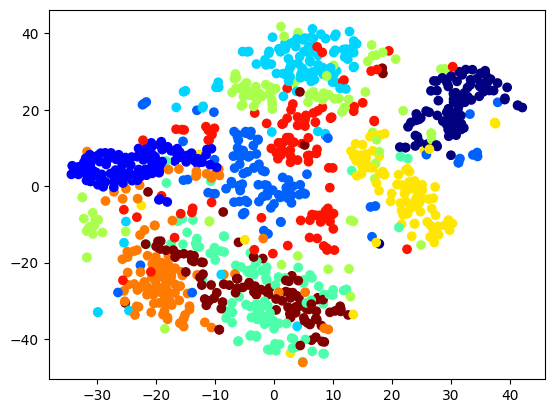

In [15]:
# Import Manifold Learning Module From scikit-learn
import sklearn.manifold as manifold

# Select Subset Of Test Data For Embedding
data_before_embedding = x_test[1000:2000]

# Select Corresponding Labels For The Data
labels_for_data = y_test[1000:2000]

# Print Shape Of The Selected Data Subset
print(data_before_embedding.shape)

# Flatten Images And Apply t-SNE To Reduce Dimensions To 2D
data2D = manifold.TSNE().fit_transform(data_before_embedding.reshape(1000, -1))

# Create Scatter Plot Of 2D Embedding Colored By Class Labels
plt.scatter(data2D[:, 0], data2D[:, 1], c=labels_for_data, cmap='jet')

### **Run K-means Clustering on these 2D Projections *(notice misclassifications)***

/home/busatmd021/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Time Taken For K Means: 0.17444634437561035


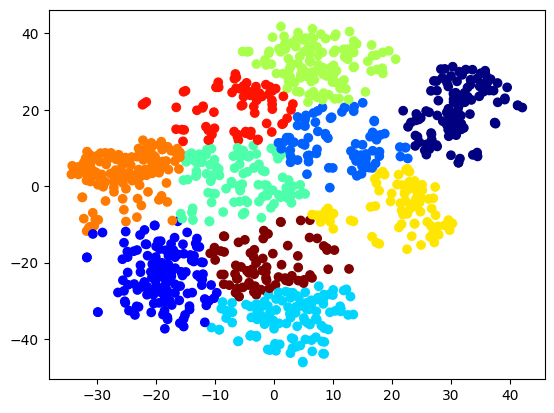

In [16]:
# Import KMeans Clustering Algorithm From scikit-learn
from sklearn.cluster import KMeans

# Import Time Module To Measure Execution Time
import time

# Record Start Time
time_start = time.time()

# Perform KMeans Clustering On 2D Embedded Data With 10 Clusters
lables_kmeans = KMeans(n_clusters=10, max_iter=1000, random_state=0).fit_predict(data2D.reshape(1000, -1))

# Alternative Clustering On Original Flattened Data (Commented Out)
# lables_kmeans = KMeans(n_clusters=10, max_iter=1000, random_state=0).fit_predict(data_before_embadding.reshape(1000, -1))

# Calculate Time Taken For Clustering
time_taken = time.time() - time_start

# Plot The t-SNE Embedding Colored By KMeans Cluster Labels
plt.scatter(data2D[:, 0], data2D[:, 1], c=lables_kmeans, cmap='jet')

# Print The Time Taken For KMeans Clustering
print('Time Taken For K Means:', time_taken)

### **Use Autoencoder's Bottleneck Output for TSNE**

- More meaningful data distribution *(digits less scattered).*

In [17]:
def extract_bottleneck_features(model, data_before_embedding, device=None):
    """
    Runs Data Through The Encoder Up To The Bottleneck And Returns Raw Feature Vectors And Labels.
    """
    # Set Device To Specified Or Default To CUDA If Available
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    
    # Move Model To Device And Set To Evaluation Mode
    model.to(device).eval()
    
    # Convert Input Data To PyTorch Tensor And Add Channel Dimension
    data_before_embedding = torch.tensor(data_before_embedding, dtype=torch.float32).unsqueeze(1)
    
    # Initialize Lists To Store Features And Labels
    all_feats, all_labels = [], []
    
    # Disable Gradient Calculation For Inference
    with torch.no_grad():
        # Loop Through Each Image In The Dataset
        for imgs in data_before_embedding:
            # Move Image To Device
            imgs = imgs.to(device)
            
            # Add Batch Dimension (1, 1, 28, 28)
            x = imgs.unsqueeze(0)
            
            # Pass Through First Encoder Conv Layer + ReLU Activation
            x = model.relu(model.enc_conv1(x))
            
            # Apply Pooling (Output Size: 8×14×14)
            x = model.pool(x)
            
            # Pass Through Second Encoder Conv Layer + ReLU
            x = model.relu(model.enc_conv2(x))
            
            # Apply Pooling (Output Size: 8×7×7)
            x = model.pool(x)
            
            # Pass Through Third Encoder Conv Layer + ReLU (Output Size: 4×7×7)
            x = model.relu(model.enc_conv3(x))
            
            # Flatten The Output To Vector (N, 4*7*7)
            x = model.flatten(x)
            
            # Fully Connected Layer With ReLU (N, 100)
            x = model.relu(model.fc_enc1(x))
            
            # Bottleneck Layer With Sigmoid Activation (N, 50)
            x = model.sigmoid(model.fc_bottle(x))
            
            # Append Bottleneck Features To List (Move To CPU And Convert To NumPy)
            all_feats.append(x.cpu().numpy())
            
            # Optionally Append Labels (Currently Commented Out)
            # all_labels.append(labels.numpy())
    
    # Stack All Feature Vectors Vertically Into A Single Array
    feats = np.vstack(all_feats)
    
    # Concatenate All Labels (Commented Out)
    # labs = np.concatenate(all_labels)
    
    # Print Shape Of Extracted Bottleneck Features
    print(f"Bottleneck Features Shape: {feats.shape}")
    
    # Return Bottleneck Feature Array
    return feats

Bottleneck Features Shape: (1000, 50)
(1000, 50)
0.9921497 0.0013474418


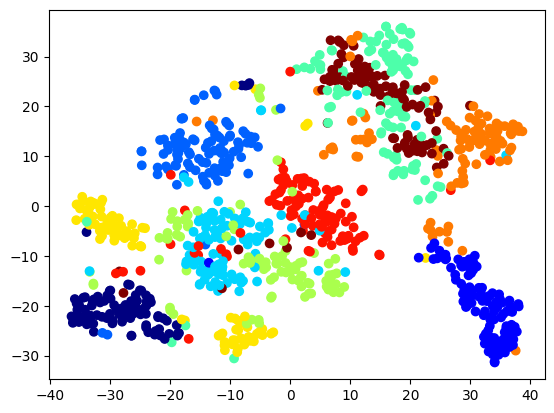

In [18]:
# Extract Bottleneck Features From The Model For The Given Data
bottleneck_output = extract_bottleneck_features(model, data_before_embedding)

# Reshape Features To 2D Array (Samples, Features)
bottleneck_output = bottleneck_output.reshape(bottleneck_output.shape[0], -1)

# Print Shape Of Bottleneck Feature Matrix
print(bottleneck_output.shape)

# Print Maximum And Minimum Values In The Bottleneck Features
print(np.max(bottleneck_output), np.min(bottleneck_output))

# Perform t-SNE Dimensionality Reduction On Bottleneck Features
embeddings = manifold.TSNE().fit_transform(bottleneck_output)

# Plot The 2D Embeddings Colored By Their Corresponding Labels
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels_for_data, cmap='jet')

<br/>

### **Clustering More Consistent with the Labels**

/home/busatmd021/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Time Taken For K Means: 0.17444634437561035


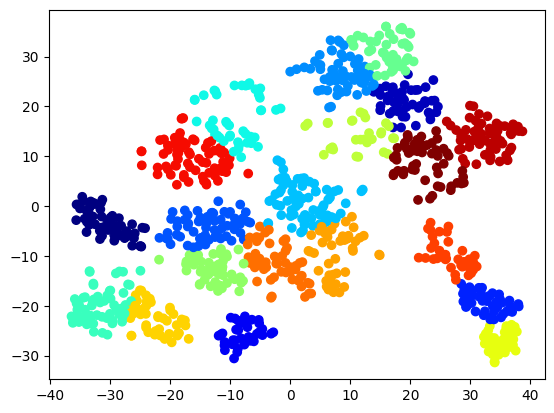

In [19]:
# Perform KMeans Clustering On The 2D t-SNE Embeddings With 20 Clusters
lables_kmeans_embedded = KMeans(n_clusters=20, max_iter=1000, random_state=0).fit_predict(embeddings)

# Plot The Embeddings Colored By The Cluster Assignments
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=lables_kmeans_embedded, cmap='jet')

# Print Previously Recorded Time Taken For KMeans (May Not Reflect Current Run)
print('Time Taken For K Means:', time_taken)